# Introduction about ACF and PACF

Autocorrelation analysis is an important step in the Exploratory Data Analysis (EDA) of time series. **The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness.**
It is especially important when you intend to use an ARIMA model for forecasting because the autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

<!-- **Overview**
* [Fundamentals](#Fundamentals)<br>
    * [Auto-Regressive and Moving Average Models](#[Auto-Regressive-and-Moving-Average-Models])<br>
    * [Stationarity](#Stationarity)<br>
    * [Autocorrelation Function and Partial Autocorrelation Function](#Autocorrelation-Function-and-Partial-Autocorrelation-Function)<br>
    * [Order of AR, MA, and ARMA Model](#Order-of-AR-MA-and-ARMA-Model)
* [Examples](#Examples)<br>
    * [AR(1) Process](#AR(1%29-Process)<br>
    * [AR(2) Process](#AR(2%29-Process)<br>
    * [MA(1) Process](#MA(1%29-Process)<br>
    * [MA(2) Process](#MA(2%29-Process)<br>
    * [Periodical](#Periodical)<br>
    * [Trend](#Trend)<br>
    * [White Noise](#White-Noise)<br>
    * [Random-Walk](#Random-Walk)<br>
    * [Constant](#Constant)<br>
* [🚀 Cheat Sheet](#🚀-Cheat-Sheet)<br>
* [Case Study](#Case-Study)<br>
    * [Bitcoin](#Bitcoin)<br>  
    * [Ethereum](#Ethereum)<br>
    * [Discussion on Random-Walk](#Discussion-on-Random-Walk)<br>  -->
    
<!-- If you need some introduction to or a refresher on the ACF and PACF, I recommend the following video:
<iframe width="700" height="400" src="https://www.youtube.com/embed/DeORzP0go5I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> -->

In [ ]:
import numpy as np # Mostly for linear algebra usage
from numpy.random import seed # for random numbers seed
import math
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns
import warnings # Supress warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
# from statsmodels.tsa.SARIMAX import ARMA
# statsmodels.tsa.SARIMAX
# Fix seed for reproducible results
SEED = 42
np.random.seed(SEED)
# Visualizations
lag_acf = 15
lag_pacf = 15
height = 4
width = 12

# Some Basic and Fundamentals about our motivated topic

## Auto-Regressive and Moving Average Models

### Auto-Regressive (AR) Model

$\hat{y}_t = \phi_1 y_{t-1} + \dots + {\phi_p}y_{t-p}+\epsilon_t$

The AR model assumes that the current value ($y_t$) is **dependent on previous values** ($y_{t-1}, y_{t-2}, y_{t-3},...$). Because of this assumption, we can build a **linear** regression model.

To figure out the order of an AR model, you would use the **PACF**.

### Moving Average (MA) Model

$\hat{y}_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_{q} \epsilon_{t-q}$

The MA model assumes that the current value ($y_t$) is **dependent on the error terms** including the current error ($\epsilon_{t}, \epsilon_{t-1}, \epsilon_{t-2}, \epsilon_{t-3},...$). Because error terms are random, there is **no linear** relationship between the current value and the error terms.

To figure out the order of an MA model, you would use the **ACF**.

## Stationarity

ACF and PACF assume stationarity of the underlying time series.
Staionarity can be checked by performing an **Augmented Dickey-Fuller (ADF) test**:

> - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
> - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
>
<!-- > [...] We can see that our [ADF] statistic value [...] is less than the value [...] at 1%.
This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).
Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. - [Machine Learning Mastery: How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/) -->

If the time series is stationary, continue to the next steps.
**If the time series is not stationary, try the transformations like differencing and other kind of transformations to convert the time series data status** and check its stationarity again.


In [ ]:
from statsmodels.tsa.stattools import adfuller

#Defining the function for checking stationarity through ADF
def check_stationarity(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

### Autocorrelation Function (ACF)

Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

We will be using the `plot_acf` function from the `statsmodels.graphics.tsaplots` library. (See [statsmodels.tsa.stattools.acf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html))

The ACF plot can provide answers to the following questions:
- Is the observed time series ** randomness/noise/white noise**?
- Is an observation related to an adjacent observation, an observation twice-removed, and so on?
- Can the observed time series be modeled with an **MA model**? If yes, what is the order?



### Partial Autocorrelation Function (PACF)
Additional correlation explained by each successive lagged term. The correlation between pbservations at two time spots given that we consider both observations are correlated to observations at other time spots.
> The partial autocorrelation at lag k is the autocorrelation between $y_t$ and $y_{t−k}$ that is not accounted for by lags 1 through $k−1$.

We will be using the `plot_pacf` function from the `statsmodels.graphics.tsaplots` library with the parameter `method = "ols"` (regression of time series on lags of it and on constant). (See [statsmodels.tsa.stattools.pacf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html))

**Note:** The default parameter for `method` is `yw` (Yule-Walker with sample-size adjustment in denominator for acovf). However, this default value is causing some implausible autocorrelations higher than 1 on the sample data. Therefore, we change the `method` parameter to one that is not causing this issue. `ywmle` would also work fine as suggested in this [StackExchange post](https://stats.stackexchange.com/questions/380196/what-do-very-high-pacf-values-10-mean)

The PACF plot can provide answers to the following questions:
- Can the observed time series be modelled with an **AR model**? If yes, what is the order?

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Both the ACF and PACF start with a **lag of 0**, which is the correlation of the time series with itself and therefore results in a **correlation of 1**.

The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.

Furthermore, you will see a **blue area** in the ACF and PACF plots, which depicts the 95% confidence interval and is in indicator for the **significance threshold**. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

## Order of AR, MA, and ARMA Model
To determine the order of the model, you can use the following table:

| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) | Significant at lag $q$ / Cuts off after lag $q$|Tails off (Geometric decay) |
|PACF| Significant at each lag $p$ / Cuts off after lag $p$|Tails off (Geometric decay) |Tails off (Geometric decay) |

<!-- To build some intuition about how to determine the order of an AR or MA model, I recommend this video:
<iframe width="700" height="400" src="https://www.youtube.com/embed/ZE_WGBe0_VU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> -->

# Examples/Small Illustrations

## AR(1) Process
The following time series is an AR(1) process with 150 timesteps and the following parameters:

In [ ]:
phi_1 = 0.5

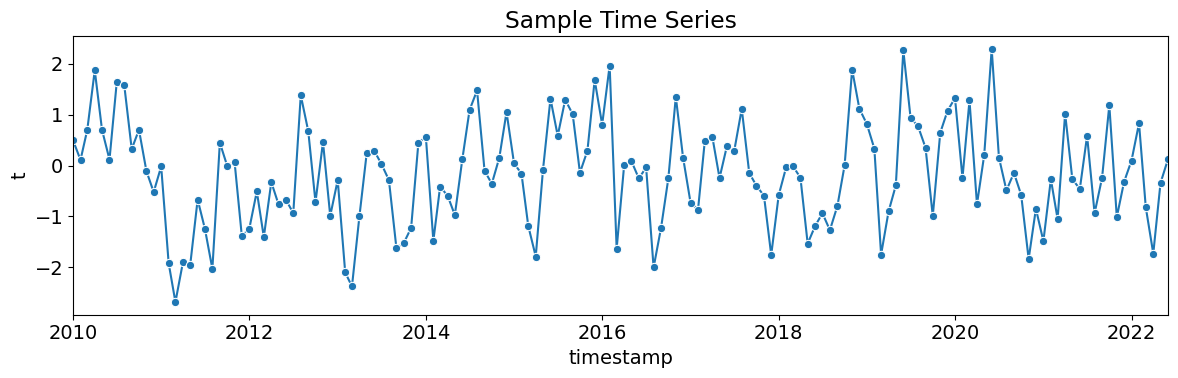

In [ ]:
num_samples =  150
np.random.seed(SEED)
ar = np.r_[1, -np.array([phi_1])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2010-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -7.863231
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1)

| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) |Significant at lag $q$ / Cuts off after lag $q$  |Tails off (Geometric decay) |
|PACF| <span style= 'background:yellow'> Significant at each lag $p$ / Cuts off after lag $p$ </span>|Tails off (Geometric decay) |Tails off (Geometric decay) |

-> We can use an **AR(1) model** to model this process.

So that for AR(1), we would model the AR(p) formula
$\hat{y}_t = \phi_1 y_{t-1} + \dots + {\phi_p}y_{t-p}$
to the following:

$\hat{y}_t = \phi_1 y_{t-1}$


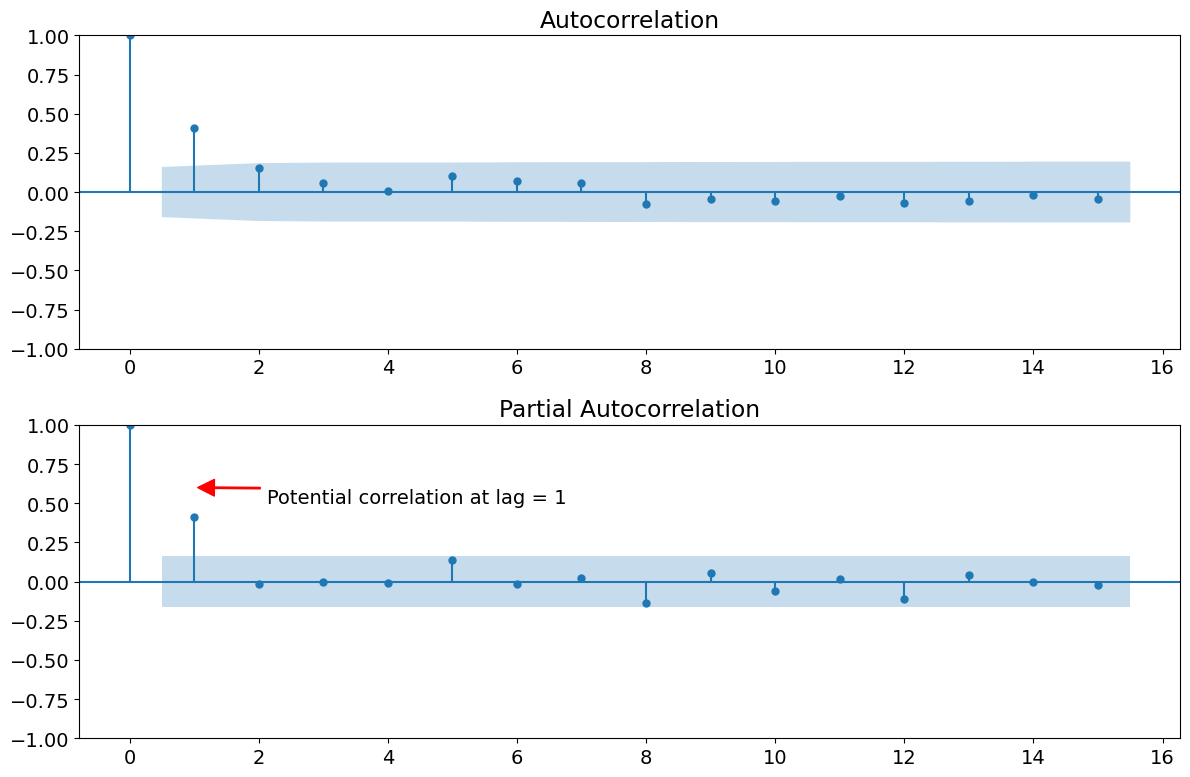

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Potential correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

### 3. Modelling

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  120
Model:                     AutoReg(1)   Log Likelihood                -159.372
Method:               Conditional MLE   S.D. of innovations              0.923
Date:                Sun, 17 Mar 2024   AIC                            324.743
Time:                        09:37:16   BIC                            333.081
Sample:                             1   HQIC                           328.129
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0886      0.086     -1.031      0.302      -0.257       0.080
t.L1           0.4744      0.081      5.846      0.000       0.315       0.633
                                    Roots           

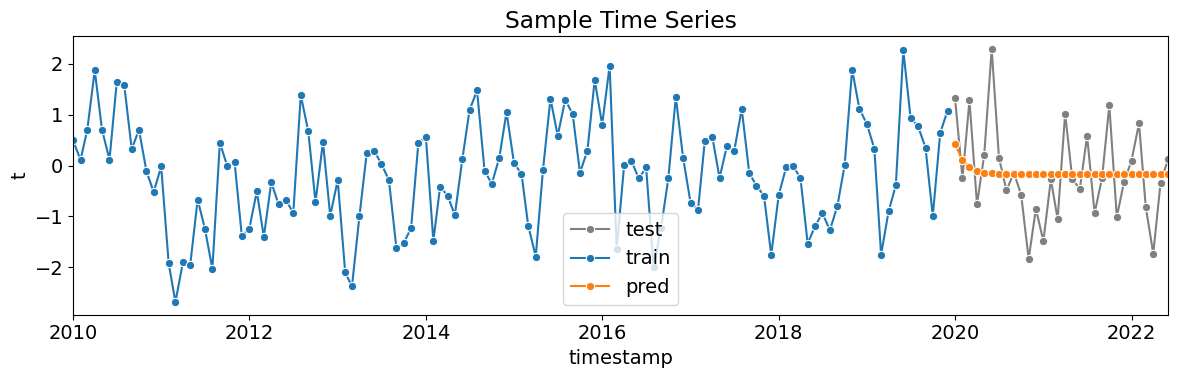

In [ ]:
train_len = int(0.8* num_samples)

train = sample['t'][:train_len]
ar_model = AutoReg(train, lags=1).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

As you can see, the AR(1) model fits an $\phi_1 = 0.4710$, which is quite close to the `phi_1 = 0.5` which we have set. However, the predicted values seem to be quite off in this case.

## AR(2) Process
The following time series is an AR(2) process with 128 timesteps and the following parameters:

In [ ]:
phi_1 = 0.5
phi_2= -0.5

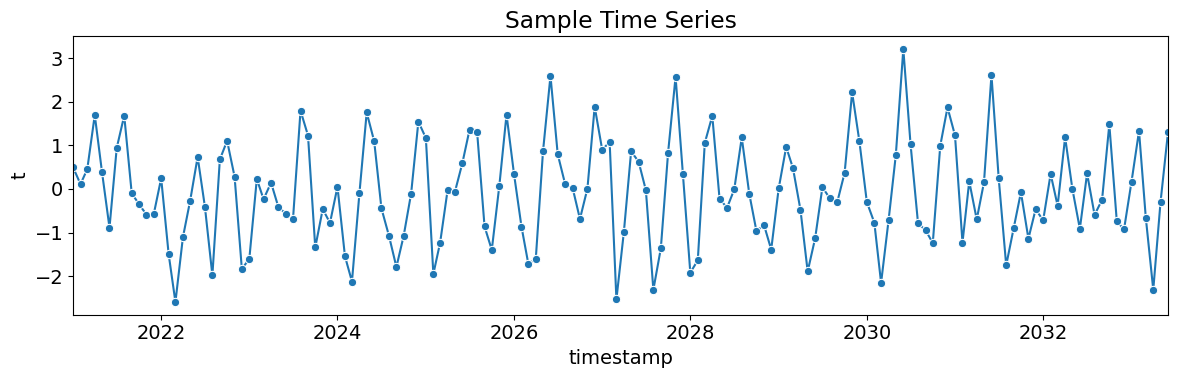

In [ ]:
np.random.seed(SEED)
ar = np.r_[1, -np.array([phi_1, phi_2])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -9.799589
p-value: 0.000000
Critical Values:
	1%: -3.476
	5%: -2.881
	10%: -2.577
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1) and near-adjacent (lag = 2) observations

| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) |Significant at lag $q$ / Cuts off after lag $q$  |Tails off (Geometric decay) |
|PACF| <span style= 'background:yellow'> Significant at each lag $p$ / Cuts off after lag $p$ </span>|Tails off (Geometric decay) |Tails off (Geometric decay) |

-> We can use an **AR(2) model** to model this process.

So that for AR(2), we would model the AR(p) formula
$\hat{y}_t = \phi_1 y_{t-1} + \dots + {\phi_p}y_{t-p}$
to the following:

$\hat{y}_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} $


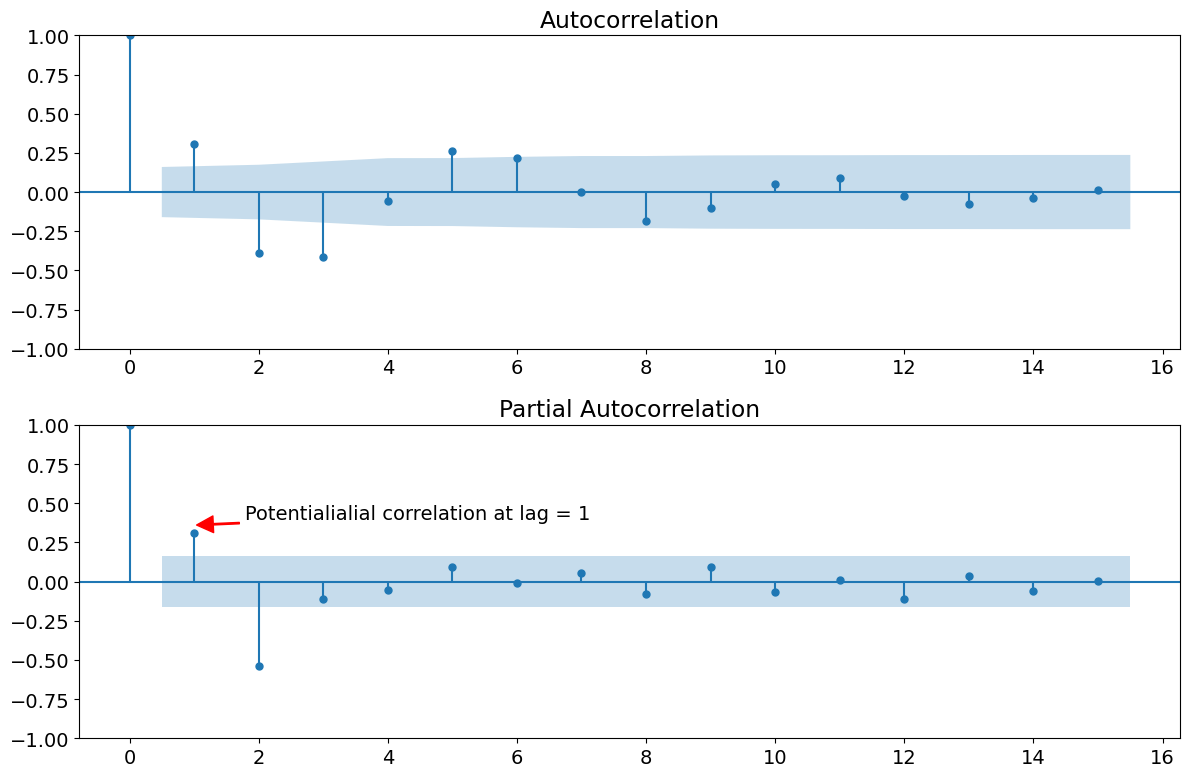

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Potentialialial correlation at lag = 1', xy=(1, 0.36),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

# ax[1].annotate('Potential correlation at lag = 2', xy=(2.1, -0.5),  xycoords='data',
#             xytext=(0.25, 0.1), textcoords='axes fraction',
#             arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

### 3. Modelling

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  120
Model:                     AutoReg(2)   Log Likelihood                -157.912
Method:               Conditional MLE   S.D. of innovations              0.922
Date:                Sun, 17 Mar 2024   AIC                            323.824
Time:                        09:46:05   BIC                            334.907
Sample:                             2   HQIC                           328.324
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0864      0.085     -1.012      0.311      -0.254       0.081
t.L1           0.5566      0.076      7.337      0.000       0.408       0.705
t.L2          -0.5827      0.076     -7.663      0.0

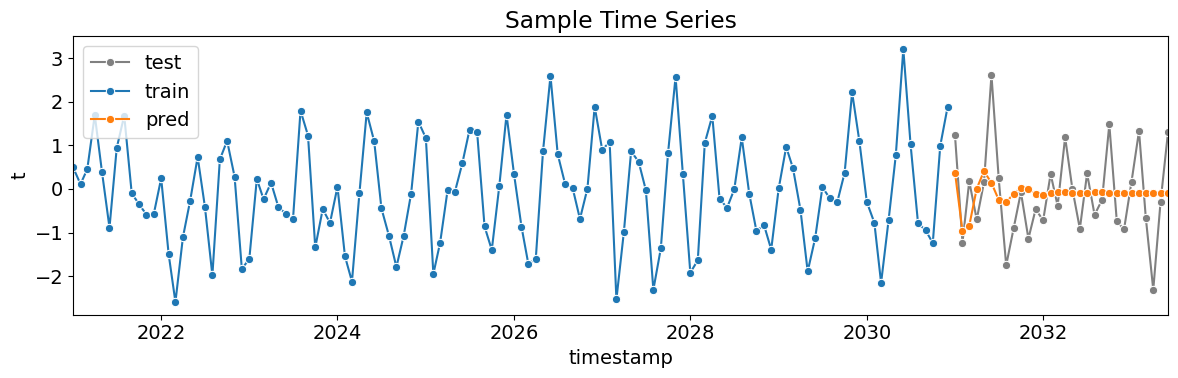

In [ ]:
train = sample['t'][:train_len]
ar_model = AutoReg(train, lags=2).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

As you can see, the AR(2) model fits $\phi_1 = 0.5191$ and $\phi_2 = -0.5855$, which is quite close to the `phi_1 = 0.5` and `phi_2 = -0.5` which we have set. However, the predicted values seem to be quite off as well in this case - similarly to the AR(1) case.

## MA(1) Process
The following time series is an MA(1) process with 120 timesteps and the following parameters:

In [ ]:
theta_1 = 0.5

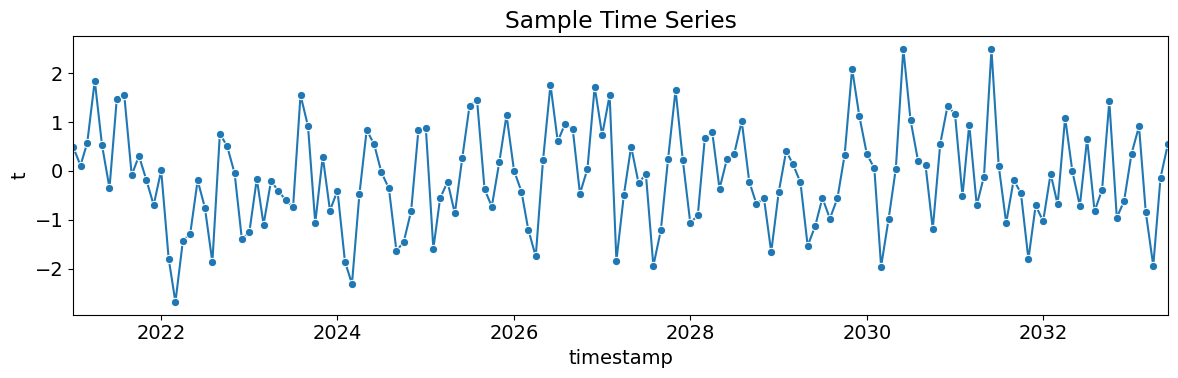

In [ ]:
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([theta_1])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -8.715857
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1)

| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) | <span style= 'background:yellow'> Significant at lag $q$ / Cuts off after lag $q$  </span> |Tails off (Geometric decay) |
|PACF| Significant at each lag $p$ / Cuts off after lag $p$ |Tails off (Geometric decay) |Tails off (Geometric decay) |

-> We can use an **MA(1) model** to model this process.

So that for MA(1), we would model the MA(q) formula
$\hat{y}_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_{q} \epsilon_{t-q}$
to the following:

$\hat{y}_t = \epsilon_t + \theta_1 \epsilon_{t-1}$


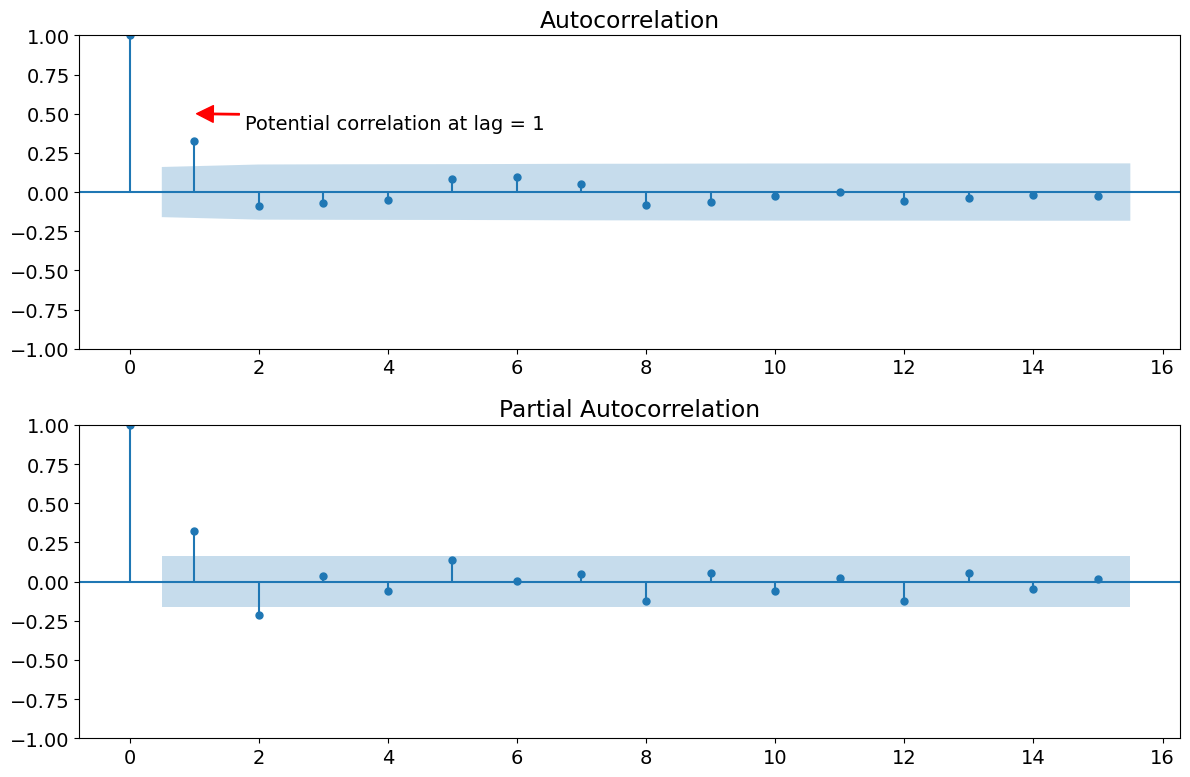

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[0].annotate('Potential correlation at lag = 1', xy=(1, 0.5),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

### 3. Modelling

In [ ]:
# import statsmodels.tsa.arima_model.ARIMA

train = sample['t'][:train_len]
ma_model = ARMA(train, order=(0,1)).fit()

print(ma_model.summary())
pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


As you can see, the MA(1) model fits $\theta_1 = 0.5172$, which is quite close to the `theta_1 = 0.5`. However, the predicted values seem to be quite off as well in this case - similarly to the AR(p) cases.

## MA(2) Process
The following time series is an MA(2) process with 128 timesteps and the following parameters:

In [ ]:
theta_1 = 0.5
theta_2 = 0.5

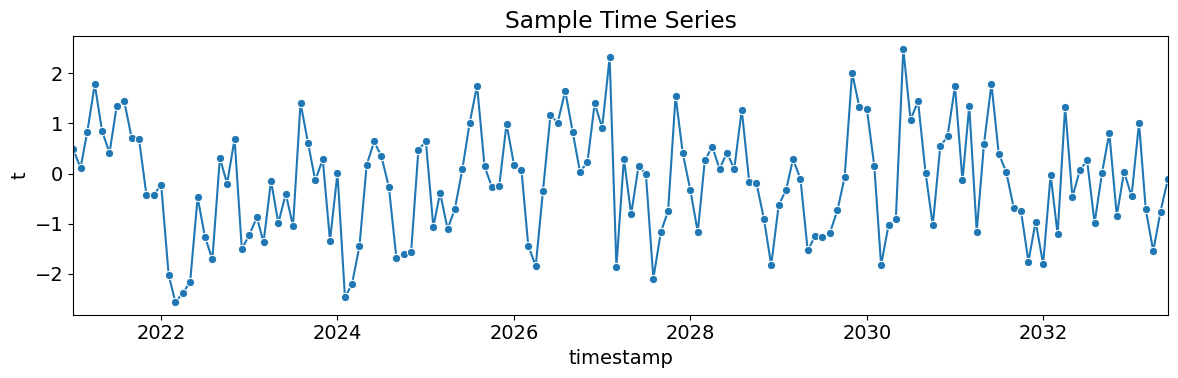

In [ ]:
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([theta_1, theta_2])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -4.090438
p-value: 0.001004
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.578
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1) and near-adjacent (lag = 2) observations

| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) | <span style= 'background:yellow'> Significant at lag $q$ / Cuts off after lag $q$  </span> |Tails off (Geometric decay) |
|PACF| Significant at each lag $p$ / Cuts off after lag $p$ |Tails off (Geometric decay) |Tails off (Geometric decay) |

-> We can use an **MA(2) model** to model this process.

So that for MA(2), we would model the MA(q) formula
$\hat{y}_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_{q} \epsilon_{t-q}$
to the following:

$\hat{y}_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}$

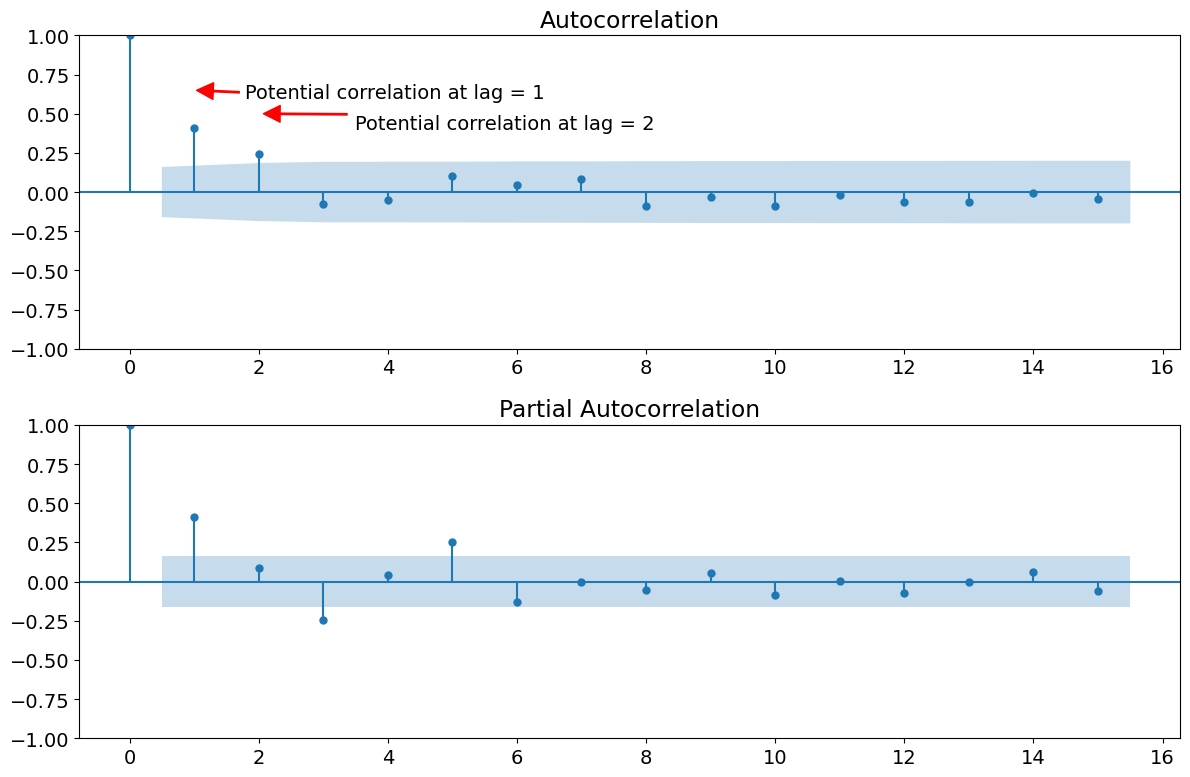

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[0].annotate('Potential correlation at lag = 1', xy=(1, 0.65),  xycoords='data',
            xytext=(0.15, 0.8), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[0].annotate('Potential correlation at lag = 2', xy=(2, 0.5),  xycoords='data',
            xytext=(0.25, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

### 3. Modelling

In [ ]:
train = sample['t'][:train_len]
ma_model = ARMA(train, order=(0,2)).fit()

print(ma_model.summary())
pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


As you can see, the MA(2) model fits $\theta_1 = 0.5226$ and $\theta_2 = -0.5843$, which is quite close to the `theta_1 = 0.5` and `theta_2 = 0.5` which we have set. However, the predicted values seem to be quite off as well in this case - similarly to the MA(1) case.

## Periodical
The following time series is periodical with T=12. It consists of 48 timesteps.

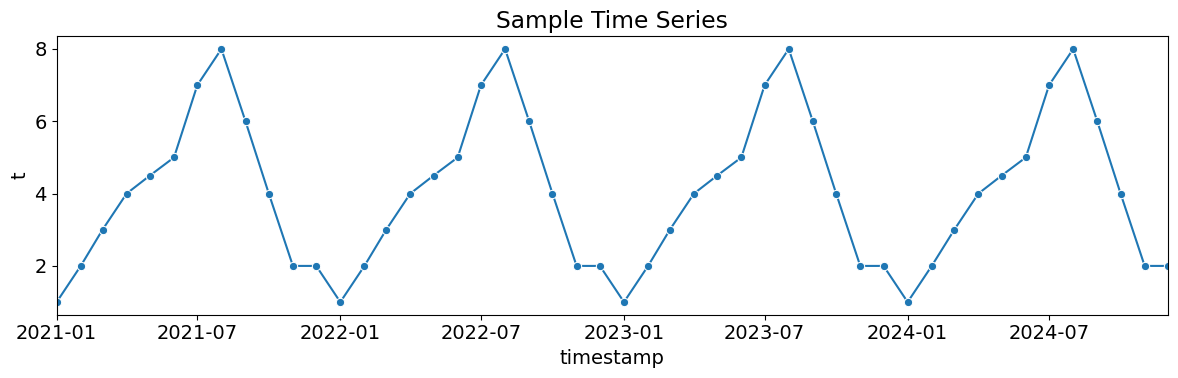

In [ ]:
T = 12

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2]
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -24886124212233.375000
p-value: 0.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1) and near-adjacent observations
- From both the ACF and PACF plot, we can see a Potential correlation with the adjacent observation (lag = 1) and also at a lag of 12, which is the amount of T.


| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) |Significant at lag $q$ / Cuts off after lag $q$  |Tails off (Geometric decay) |
|PACF| <span style= 'background:yellow'> Significant at each lag $p$ / Cuts off after lag $p=12$ </span>|Tails off (Geometric decay) |Tails off (Geometric decay) |

-> We can use an AR(12) model to model this process.

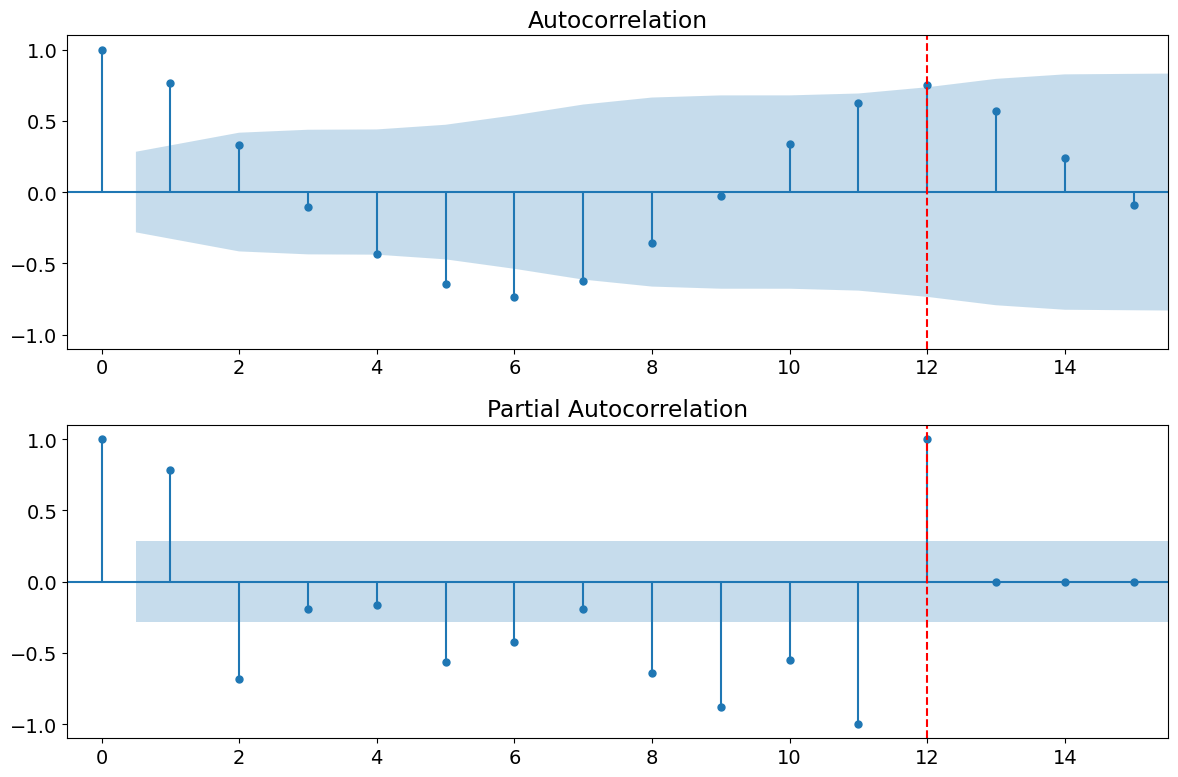

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

for i in range(2):
    ax[i].axvline(x=T, color='r', linestyle='--')
    ax[i].set_xlim([-0.5, lag_acf+0.5])
    ax[i].set_ylim([-1.1, 1.1])

plt.tight_layout()
plt.show()

### 3. Modelling

In [ ]:
train = sample['t'][:26]
ar_model = AutoReg(train, lags=10).fit()

print(ar_model.summary())
pred = ar_model.predict(start=26, end=48, dynamic=False)

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                   26
Model:                    AutoReg(10)   Log Likelihood                   5.206
Method:               Conditional MLE   S.D. of innovations              0.175
Date:                Sun, 17 Mar 2024   AIC                             13.589
Time:                        10:03:56   BIC                             22.860
Sample:                            10   HQIC                            14.063
                                   26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2224      3.455      7.011      0.000      17.451      30.993
t.L1          -0.4569      0.219     -2.091      0.037      -0.885      -0.029
t.L2          -0.0940      0.088     -1.066      0.2

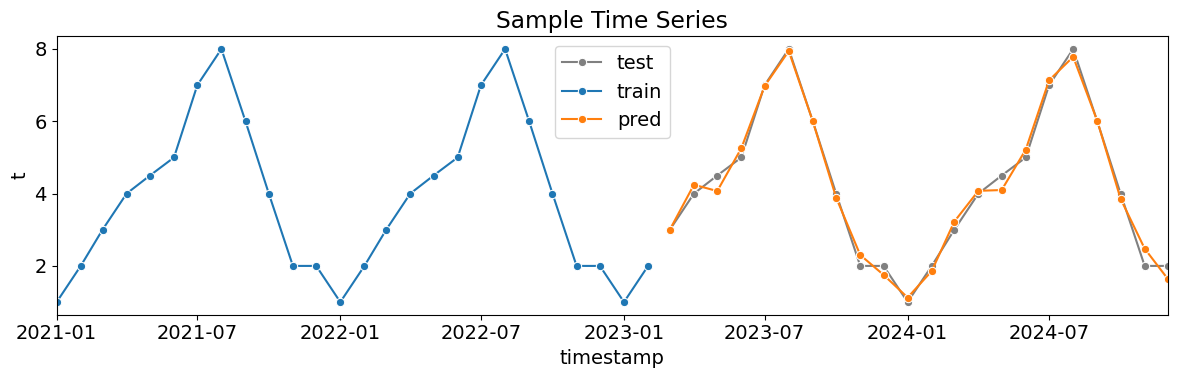

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[26:48], y=sample.t[26:48], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:26], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[26:48], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

As you can see, the AR(12) model fits the periodical time series perfectly with $\phi_{1...11} = -0.0004$ and $\phi_12 = 0.9996$.

The model $\hat{y}_t = \phi_1 y_{t-1} + \dots + {\phi_p}y_{t-p}$ with $p=12$ results in:
$\hat{y}_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} + \phi_5 y_{t-5} + \phi_6 y_{t-6} + \phi_7 y_{t-7} + \phi_8 y_{t-8} + \phi_9 y_{t-9} + \phi_{10} y_{t-10} + \phi_{11} y_{t-11} + {\phi_{12}}y_{t-12}$

And with the coefficients $\phi_{1...11} = -0.0004 \approx 0 $ and $\phi_{12} = 0.9996 \approx 1$, we get:

$\hat{y}_t = y_{t-12}$

## Trend

The following time series is the same as [Periodical](#Periodical) (periodical with T=12) with added trend. It consists of 48 timesteps.

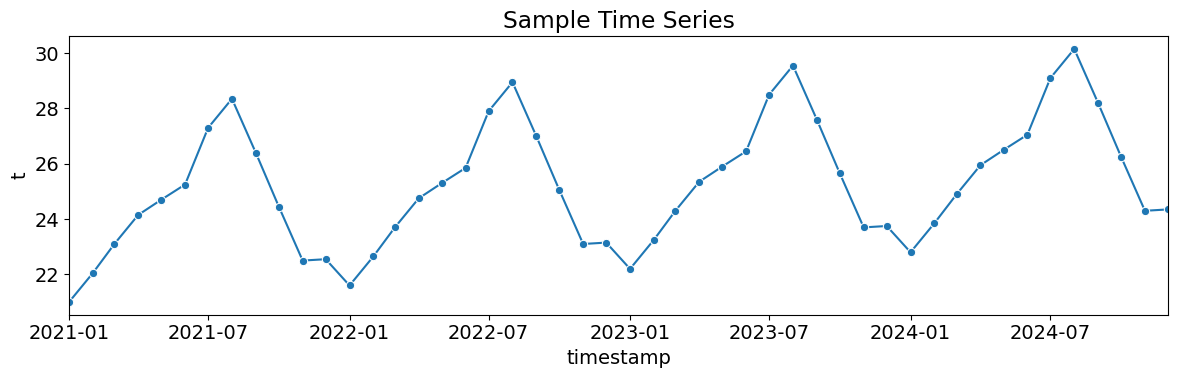

In [ ]:
time = np.arange(0, 48)
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2] + ((0.05*time)+20)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is non-stationary.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -0.117684
p-value: 0.947648
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Non-stationary


Therefore, we need to difference the time series.

In [ ]:
sample['t_diff'] = sample['t'].diff().fillna(0)

display(sample.head(5).style.set_caption('Sample Time Series'))

check_stationarity(sample['t_diff'])

,timestamp,t,t_diff
0,2021-01-01 00:00:00,21.000000,0.000000
1,2021-02-01 00:00:00,22.050000,1.050000
2,2021-03-01 00:00:00,23.100000,1.050000
3,2021-04-01 00:00:00,24.150000,1.050000
4,2021-05-01 00:00:00,24.700000,0.550000


ADF Statistic: -21.691240
p-value: 0.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Stationary


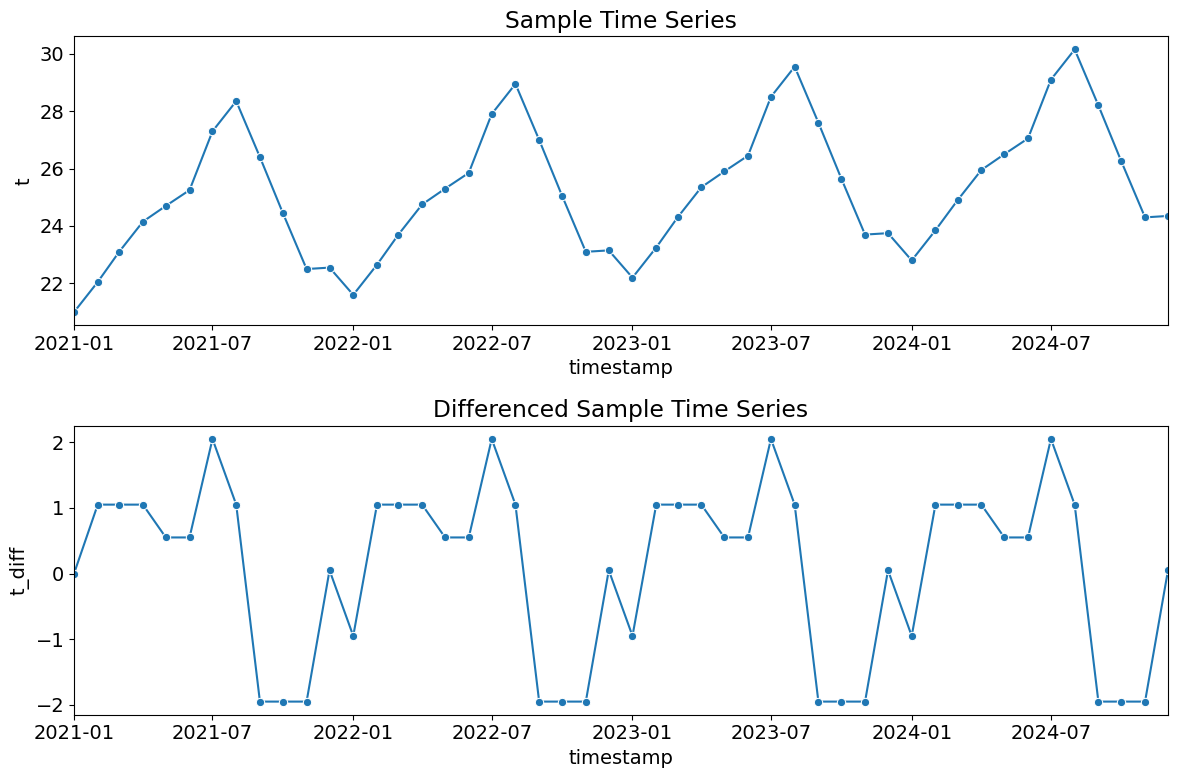

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[0])
ax[0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])

ax[0].set_title('Sample Time Series')

sns.lineplot(x=sample.timestamp, y=sample['t_diff'], marker='o', ax=ax[1])
ax[1].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[1].set_title('Differenced Sample Time Series')
plt.tight_layout()
plt.show()

### 2. Check ACF and PACF

We can make the following observations:
- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
- High degree of autocorrelation between adjacent (lag = 1) and near-adjacent observations

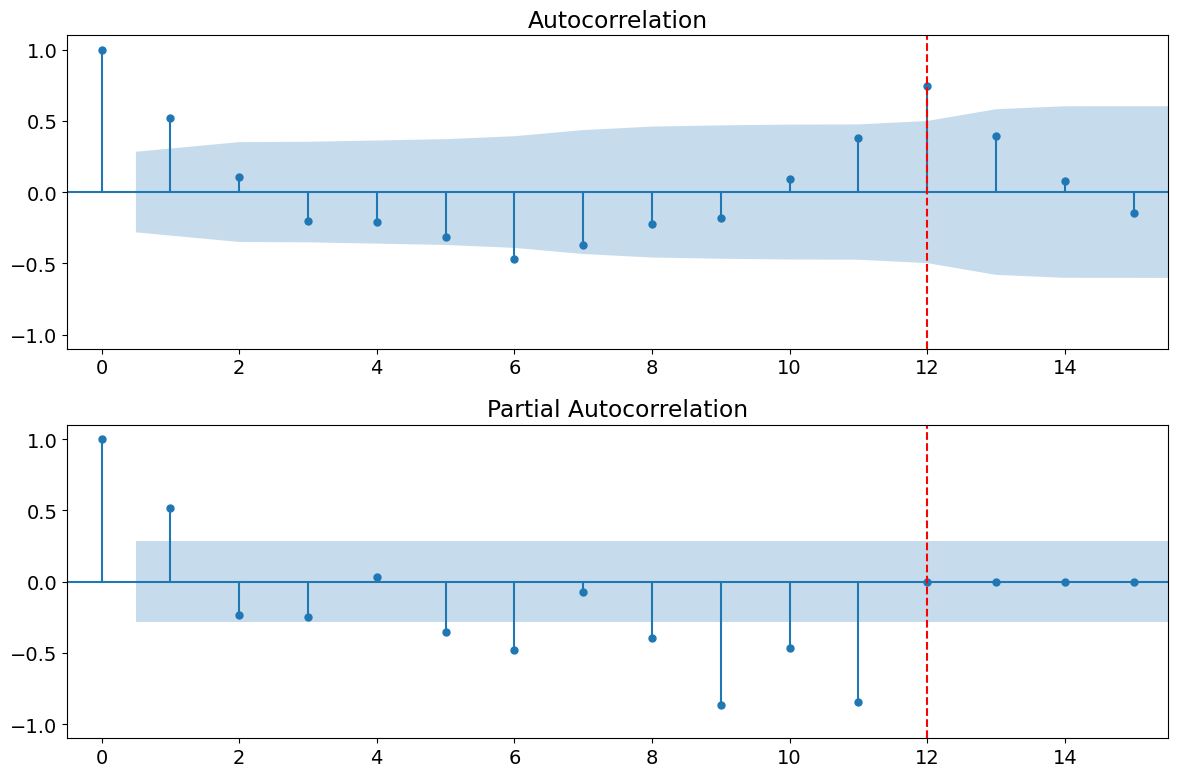

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t_diff'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t_diff'],lags=lag_pacf, ax=ax[1], method='ols')

for i in range(2):
    ax[i].axvline(x=T, color='r', linestyle='--')
    ax[i].set_xlim([-0.5, lag_acf+0.5])
    ax[i].set_ylim([-1.1, 1.1])

plt.tight_layout()
plt.show()

### 3. Modelling

## White Noise

The following time series is random. It consists of 48 timesteps.

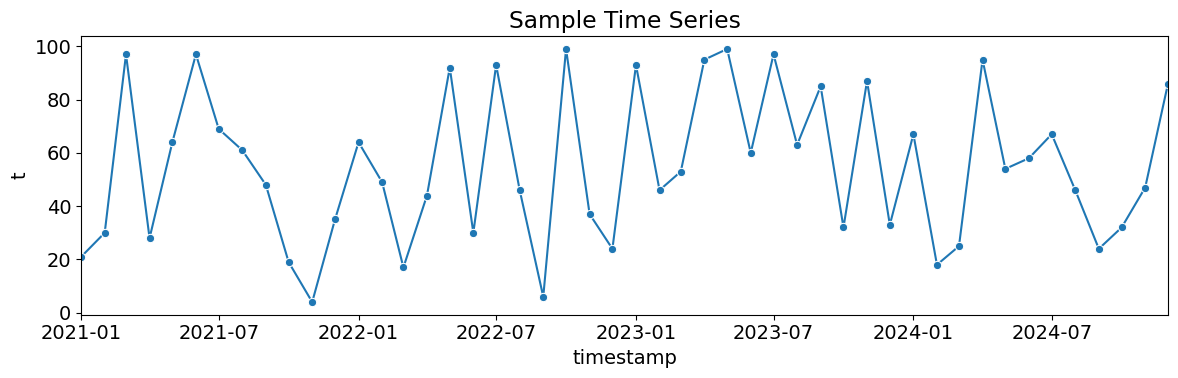

In [ ]:
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : np.random.randint(1,101,len(time))
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is stationary. Therefore, we do not need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -7.200172
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- There is only one autocorrelation that is significantly non-zero at a lag of 0. Therefore, the time series is random.

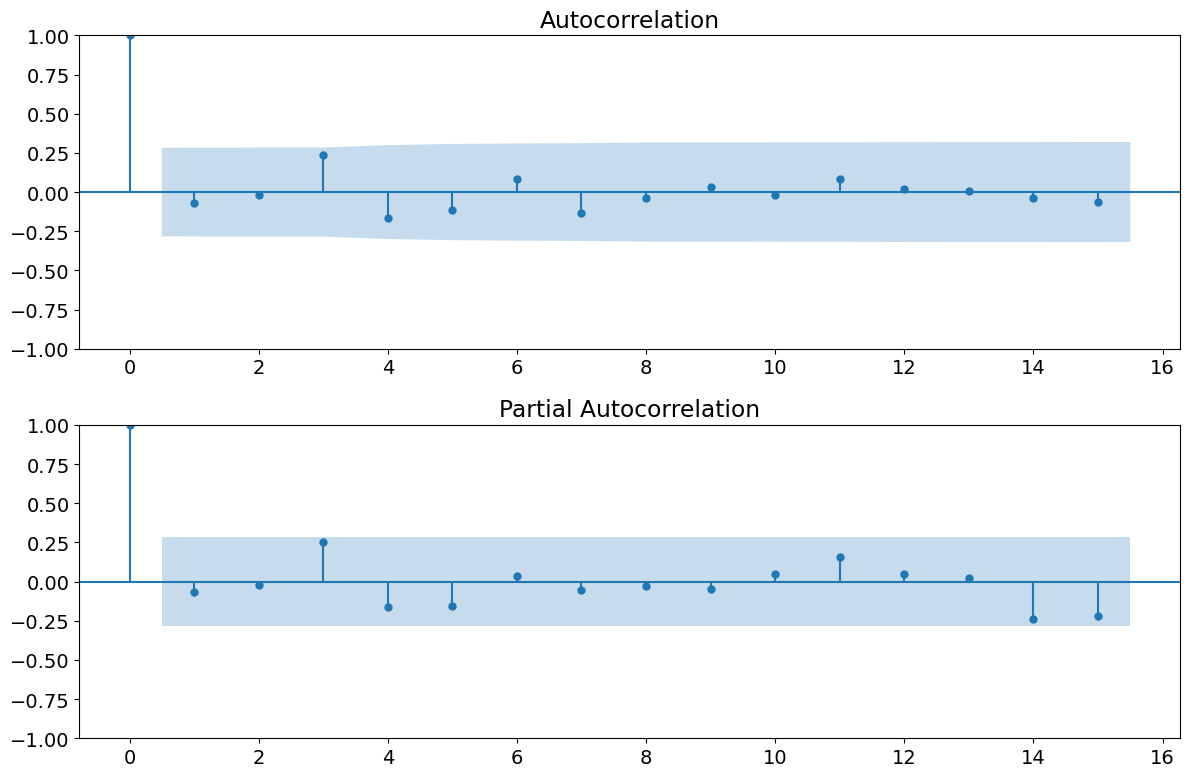

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

### 3. Modelling

Modelling white noise is difficult because we cannot retrieve any parameters from the ACF and PACF plots.

## Random-Walk

The following time series is random like [White Noise](#White-Noise). However, the current value depends on the previous one. It consists of 48 timesteps.

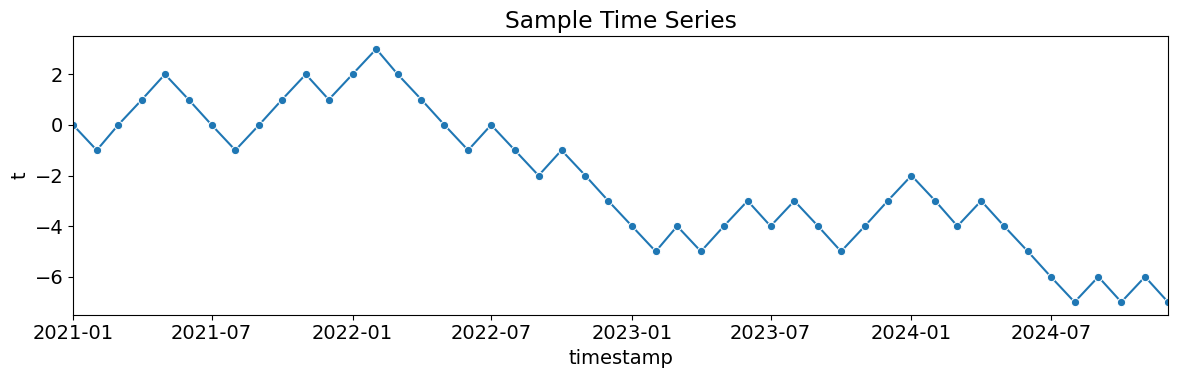

In [ ]:
# Copied from https://towardsdatascience.com/time-series-from-scratch-white-noise-and-random-walk-5c96270514d3
# Start with a random number - let's say 0
np.random.seed(42)

random_walk = [0]

for i in range(1, 48):
    # Movement direction based on a random number
    num = -1 if np.random.random() < 0.5 else 1
    random_walk.append(random_walk[-1] + num)

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : random_walk
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is non-stationary. Therefore, we need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ADF Statistic: -0.731503
p-value: 0.838420
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Non-stationary


In [ ]:
sample['t_diff'] = sample['t'].diff().fillna(0)

check_stationarity(sample['t_diff'])

ADF Statistic: -3.047661
p-value: 0.030677
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Stationary


### 2. Check ACF and PACF

We can make the following observations:
- In contrast to the ACF and PACF of the [White Noise](#White-Noise) process, we can see that for a lag of 1, we have some light correlation because the current value depends on the previous one.

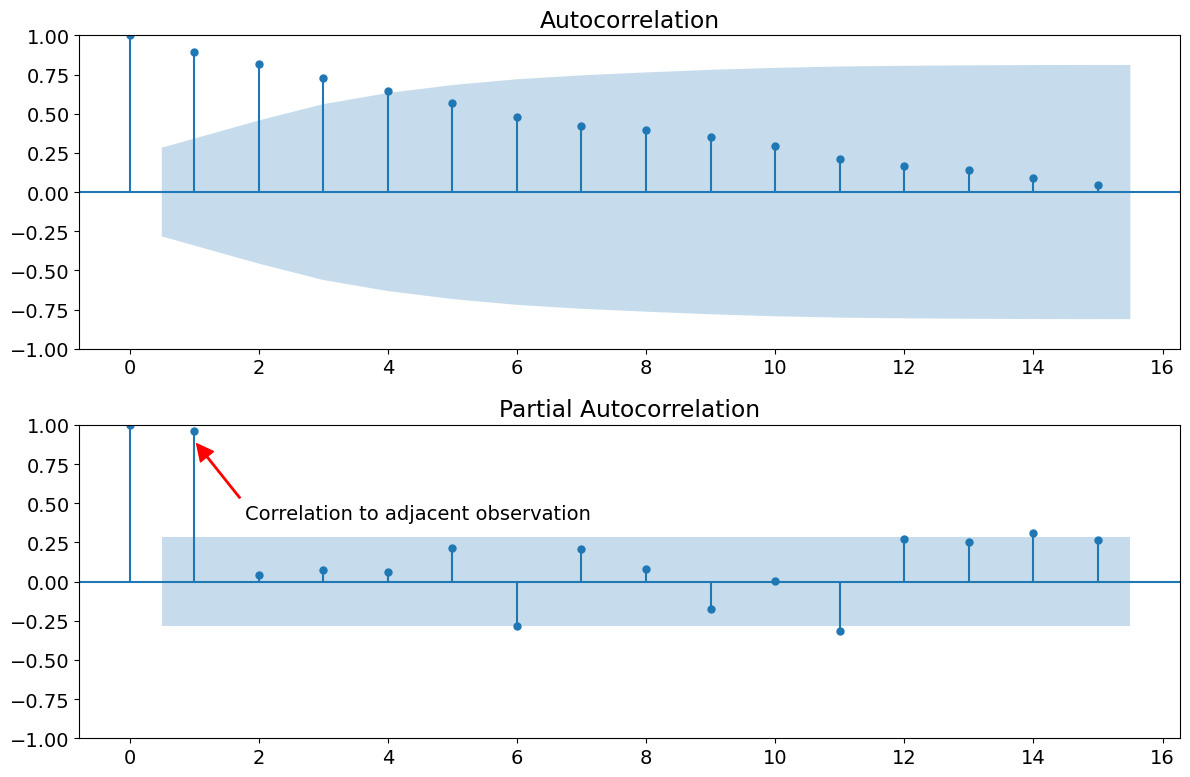

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Correlation to adjacent observation', xy=(1, 0.9),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))
plt.tight_layout()
plt.show()

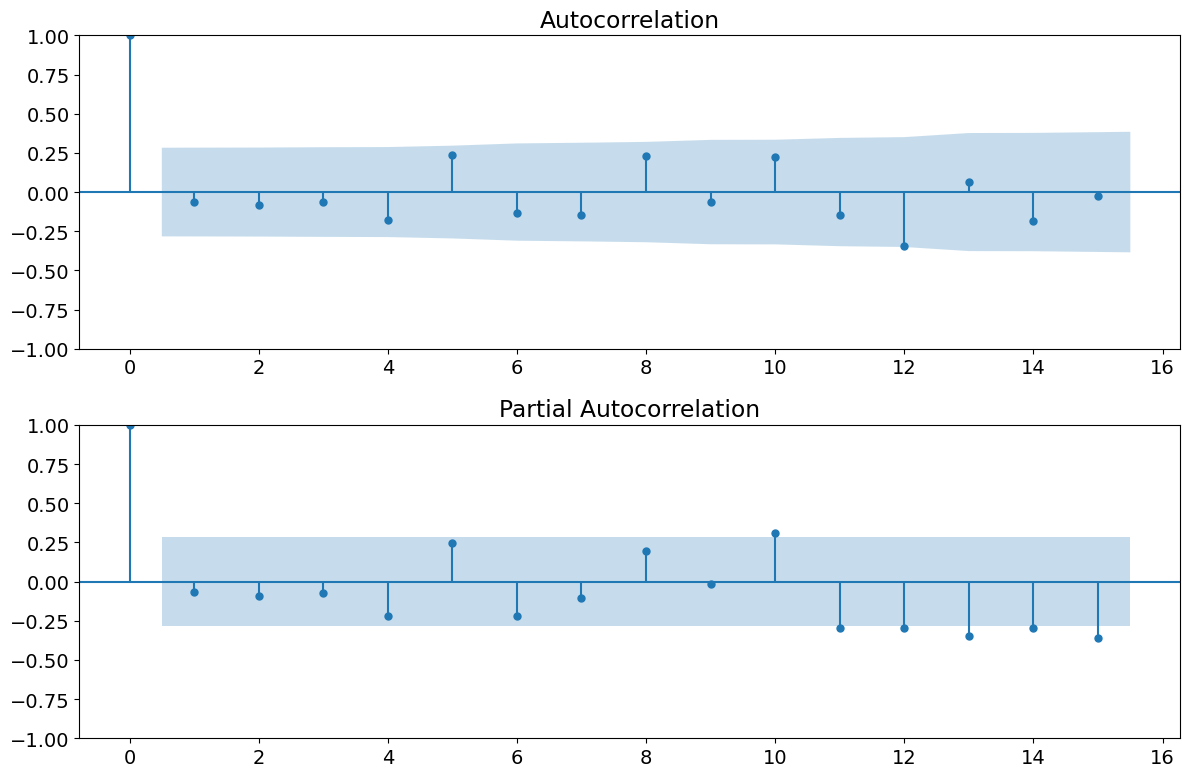

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t_diff'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t_diff'],lags=lag_pacf, ax=ax[1], method='ols')
plt.tight_layout()
plt.show()

### 3. Modelling

Similarly to white noise, modelling random-walk is difficult because we cannot retrieve any parameters from the ACF and PACF plots.

## Constant

The following time series is constant. It consists of 48 timesteps.

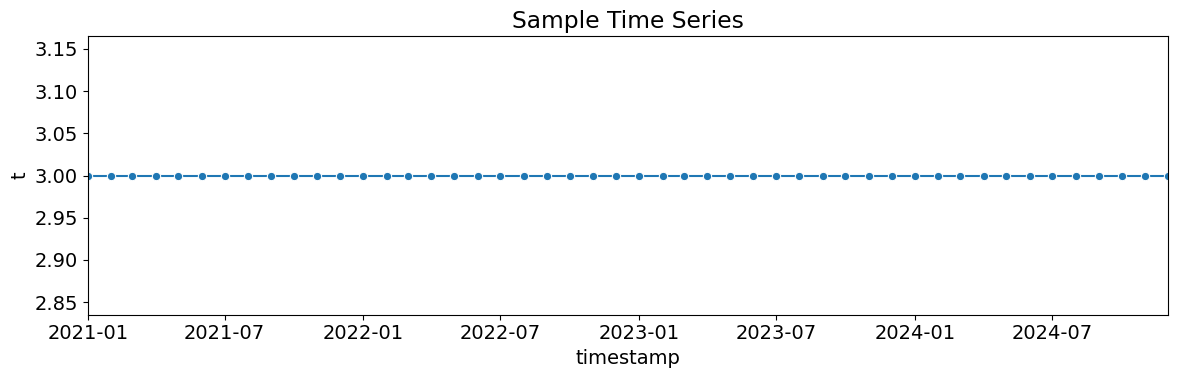

In [ ]:
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : 3
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

### 1. Check Stationarity
The sample data is non-stationary. Therefore, we need to difference the time series.

In [ ]:
check_stationarity(sample['t'])

ValueError: Invalid input, x is constant

In [ ]:
sample['t_diff'] = sample['t'].diff().fillna(0)

check_stationarity(sample['t_diff'])

ValueError: Invalid input, x is constant

### 2. Check ACF and PACF

- ACF/PACF was applied to non-stationary time series

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['t'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

### 3. Modelling

Modelling a constant as an AR or MA process is diffucult because we cannot retrieve any parameters from the ACF and PACF plots. But on the other hand, if you can retrieve that a time series is constant, it should not be too difficult to forecast it, right?

<!-- # Observations/Review

1. Check stationarity. If stationary, continue to step 2. Else use differencing until time series is stationary and then continue to step 2.
2. Check ACF and PACF with following table
| | AR($p$) | MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|
|ACF|Tails off (Geometric decay) | Significant at lag $q$ / Cuts off after lag $q$|Tails off (Geometric decay) |
|PACF| Significant at each lag $p$ / Cuts off after lag $p$|Tails off (Geometric decay) |Tails off (Geometric decay) |

3. Modelling -->

In [ ]:
f, ax = plt.subplots(nrows=10, ncols=3, figsize=(2*width, 10*height))

### AR(1) ###
np.random.seed(SEED)
ar = np.r_[1, -np.array([phi_1])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[0,0])
ax[0,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[0,0].set_title('Time Series for AR(1)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[0, 1], title='ACF for AR(1)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[0, 2], method='ols', title='PACF for AR(1)')
ax[0,2].annotate('Potential correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

### AR(2) ###
np.random.seed(SEED)
ar = np.r_[1, -np.array([phi_1, phi_2])] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[1,0])
ax[1,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[1,0].set_title('Time Series for AR(2)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[1, 1], title='ACF for AR(2)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[1, 2], method='ols', title='PACF for AR(2)')

ax[1, 2].annotate('Potential correlation at lag = 1', xy=(1, 0.36),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1, 2].annotate('Potential correlation at lag = 2', xy=(2.1, -0.5),  xycoords='data',
            xytext=(0.25, 0.1), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

### MA(1) ###
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([theta_1])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[2,0])
ax[2,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[2,0].set_title('Time Series for MA(1)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[2, 1], title='ACF for MA(1)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[2, 2], method='ols', title='PACF for MA(1)')

ax[2,1].annotate('Potential correlation at lag = 1', xy=(1, 0.5),  xycoords='data',
            xytext=(0.15, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

### MA(2) ###
np.random.seed(SEED)
ar = np.r_[1] # add zero-lag and negate
ma = np.r_[1, np.array([theta_1, theta_2])] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.tsa.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[3,0])
ax[3,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[3,0].set_title('Time Series for MA(2)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[3, 1], title='ACF for MA(2)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[3, 2], method='ols', title='PACF for MA(2)')

ax[3, 1].annotate('Potential correlation at lag = 1', xy=(1, 0.65),  xycoords='data',
            xytext=(0.15, 0.8), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[3, 1].annotate('Potential correlation at lag = 2', xy=(2, 0.5),  xycoords='data',
            xytext=(0.25, 0.7), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

### Periodical ###
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2]
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[4,0])
ax[4,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[4,0].set_title('Time Series for Periodical')

plot_acf(sample['t'],lags=lag_acf, ax=ax[4, 1], title='ACF for Periodical')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[4, 2], method='ols', title='PACF for Periodical')

ax[4,2].axvline(x=T, color='r', linestyle='--')

### Trend ###
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : ((0.05*time)+20)
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[5,0])
ax[5,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[5,0].set_title('Time Series for Trend (NON-STATIONARY!)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[5, 1], title='ACF for Trend (applied to non-stationary)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[5, 2], method='ols', title='PACF for Trend (applied to non-stationary)')

### White Noise ###
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : np.random.randint(1,101,len(time))
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[6,0])
ax[6,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[6,0].set_title('Time Series for White Noise')

plot_acf(sample['t'],lags=lag_acf, ax=ax[6, 1], title='ACF for White Noise')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[6, 2], method='ols', title='PACF for White Noise')

### Random-Walk ###
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : random_walk
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[7,0])
ax[7,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[7,0].set_title('Time Series for Random-Walk (NON-STATIONARY!)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[7, 1], title='ACF for Random-Walk (applied to non-stationary)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[7, 2], method='ols', title='PACF for Random-Walk (applied to non-stationary)')

sample['t_diff'] = sample['t'].diff().fillna(0)

plot_acf(sample['t_diff'],lags=lag_acf, ax=ax[8, 1], title='ACF for Random-Walk (applied to differenced/stationary)')
plot_pacf(sample['t_diff'],lags=lag_pacf, ax=ax[8, 2], method='ols', title='PACF for Random-Walk (applied to differenced/stationary)')


### Constant ###
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : 5
                      })

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o', ax=ax[9,0])
ax[9,0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[9,0].set_title('Time Series for Constant (NON-STATIONARY!)')

plot_acf(sample['t'],lags=lag_acf, ax=ax[9, 1], title='ACF for Constant (applied to non-stationary)')
plot_pacf(sample['t'],lags=lag_pacf, ax=ax[9, 2], method='ols', title='PACF for Constant (applied to non-stationary)')

for i in range(9):
    ax[i, 1].set_ylim([-1.1, 1.1])
    ax[i, 2].set_ylim([-1.1, 1.1])


f.delaxes(ax[8, 0])
plt.tight_layout()
plt.show()

# References
<!-- ## My Time Series Forecasting Series -->

<!-- 6.7.References   Selected References -->

**Time Series Analysis**
1. Shumway, R.H. and Stoffer, D.S. (2017) Time Series Analysis and Its Applications: With R Examples. Springer, New York.

1. Abraham, B. and Ledolter, J. (1983). Statistical Methods for Forecasting, Wiley, New York, NY.

1. Box, G. E. P., Jenkins, G. M., and Reinsel, G. C. (1994). Time Series Analysis, Forecasting and Control, 3rd ed. Prentice Hall, Englewood Clifs, NJ.

1. Box, G. E. P. and McGregor, J. F. (1974). "The Analysis of Closed-Loop Dynamic Stochastic Systems", Technometrics, Vol. 16-3.

1. Brockwell, Peter J. and Davis, Richard A. (1987). Time Series: Theory and Methods, Springer-Verlang.

1. Brockwell, Peter J. and Davis, Richard A. (2002). Introduction to Time Series and Forecasting, 2nd. ed., Springer-Verlang.

1. Chatfield, C. (1996). The Analysis of Time Series, 5th ed., Chapman & Hall, New York, NY.

1. DeLurgio, S. A. (1998). Forecasting Principles and Applications, Irwin McGraw-Hill, Boston, MA.

1. Ljung, G. and Box, G. (1978). "On a Measure of Lack of Fit in Time Series Models", Biometrika, 65, 297-303.

1. Nelson, C. R. (1973). Applied Time Series Analysis for Managerial Forecasting, Holden-Day, Boca-Raton, FL.

1. Makradakis, S., Wheelwright, S. C. and McGhee, V. E. (1983). Forecasting: Methods and Applications, 2nd ed., Wiley, New York, NY.

1. Tsay, R.S. (2013) Multivariate Time Series Analysis: With R and Financial Applications. Wiley, Hoboken.
1. Hamilton, J.D. (1994) Time Series Analysis. Princeton University Press, Princeton.
1. Enders, W. (2004) Applied Econometric Time Series, 2nd Edition. In: Wiley Series in Probability and Statistics, John Wiley & Sons, Inc., Hoboken.

1. Diebold, F.X. (2007) Elements of Forecasting. 4th Edition, South-Western, Mason.
1. Time Series Analysis: Forecasting and Control, Fourth Edition by George E. P. Box, Gregory C. Reinsel, Gwilym M. Jenkins
1. 	Anindya Banerjee, Juan J. Dolado, John W. Galbraith, David F. Hendry:
Co-Integration, Error Correction, and the Econometric Analysis of Non-Stationary Data. Advanced texts in econometrics, Oxford University Press 1993, ISBN 978-0-19-828810-7, pp. I-XIII, 1-329





**Statistical Process and Quality Control**
1. Army Chemical Corps (1953). Master Sampling Plans for Single, Duplicate, Double and Multiple Sampling, Manual No. 2.
Bissell, A. F. (1990). "How Reliable is Your Capability Index?", Applied Statistics, 39, 331-340.

1. Champ, C.W., and Woodall, W.H. (1987). "Exact Results for Shewhart Control Charts with Supplementary Runs Rules", Technometrics, 29, 393-399.

1. Chen, Jann-Pygn and Ding, Cherng. G. (2001). "A new process capability index for non-normal distributions", International Journal of Quality & Reliability Mangement, Vol. 18, No. 7, pp. 762-770.

1. Duncan, A. J. (1986). Quality Control and Industrial Statistics, 5th ed., Irwin, Homewood, IL.

1. Hotelling, H. (1947). Multivariate Quality Control. In C. Eisenhart, M. W. Hastay, and W. A. Wallis, eds. Techniques of Statistical Analysis. New York: McGraw-Hill.

1. Hunter, J. S. (1986). The Exponentially Weighted Moving Average. Journal of Quality Technology, 18(4), 203-210. doi:10.1080/00224065.1986.11979014

1. Juran, J. M. (1997). "Early SQC: A Historical Supplement", Quality Progress, 30(9) 73-81.

1. Montgomery, D. C. (2000). Introduction to Statistical Quality Control, 4th ed., Wiley, New York, NY.

1. Kotz, S. and Johnson, N. L. (1992). Process Capability Indices, Chapman & Hall, London.

1. Lowry, C. A., Woodall, W. H., Champ, C. W., and Rigdon, S. E. (1992). "A Multivariate Exponentially Weighted Moving Average Chart", Technometrics, 34, 46-53.

1. Lucas, J. M. and Saccucci, M. S. (1990). "Exponentially weighted moving average control schemes: Properties and enhancements", Technometrics 32, 1-29.

1. Ott, E. R. and Schilling, E. G. (1990). Process Quality Control, 2nd ed., McGraw-Hill, New York, NY.

1. Pearn, W. L., Tai, Y. T., Hsiao, F. and Ao, Y. P. (2014). "Approximately Unbiased Estimator for Non-Normal Process Capability Index CNpk", Journal of Testing and Evaluation, Vol. 42, No. 6, pp. 1-10.

1. Quesenberry, C. P. (1993). "The effect of sample size on estimated limits for  and X control charts", Journal of Quality Technology, 25(4) 237-247.

1. Ryan, T.P. (2000). Statistical Methods for Quality Improvement, 2nd ed., Wiley, New York, NY.

1. Ryan, T. P. and Schwertman, N. C. (1997). "Optimal limits for attributes control charts", Journal of Quality Technology, 29 (1), 86-98.

1. Schilling, E. G. (1982). Acceptance Sampling in Quality Control, Marcel Dekker, New York, NY.

1. Tracy, N. D., Young, J. C. and Mason, R. L. (1992). "Multivariate Control Charts for Individual Observations", Journal of Quality Technology, 24(2), 88-95.

1. Woodall, W. H. (1997). "Control Charting Based on Attribute Data: Bibliography and Review", Journal of Quality Technology, 29, 172-183.

1. Woodall, W. H., and Adams, B. M. (1993); "The Statistical Design of CUSUM Charts", Quality Engineering, 5(4), 559-570.

1. Zhang, Stenback, and Wardrop (1990). "Interval Estimation of the Process Capability Index", Communications in Statistics: Theory and Methods, 19(21), 4455-4470.

**Statistical Analysis**
1. Anderson, T. W. (1984). Introduction to Multivariate Statistical Analysis, 2nd ed., Wiley New York, NY.
1. Johnson, R. A. and Wichern, D. W. (1998). Applied Multivariate Statistical Analysis, Fourth Ed., Prentice Hall, Upper Saddle River, NJ.



<!-- * [Intro to Time Series Forecasting](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting)
* [Time Series Forecasting: Building Intuition](https://www.kaggle.com/iamleonie/time-series-forecasting-building-intuition)
* [Time Series Forecasting: Interpreting ACF and PACF](https://www.kaggle.com/iamleonie/time-series-interpreting-acf-and-pacf)
* [Time Series Forecasting: Tips & Tricks for Training LSTMs](https://www.kaggle.com/iamleonie/time-series-tips-tricks-for-training-lstms)

## Other Ressources
- https://www.linkedin.com/pulse/reading-acf-pacf-plots-missing-manual-cheatsheet-saqib-ali/
- https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm
- https://mxplus3.medium.com/interpreting-autocorrelation-partial-autocorrelation-plots-for-time-series-analysis-23f87b102c64
- https://towardsdatascience.com/time-series-from-scratch-white-noise-and-random-walk-5c96270514d3 -->